#    Kaggle Standard Customer Transcript Predictoin



<font size='4'>This is a data analysis portfolio written by Daniel Yoo, using data from Kaggle competition 'Santander Customer Transaction Prediction'.</font>

## <font size="4">Competition Description</font>

At Santander our mission is to help people and businesses prosper. We are always looking for ways to help our customers understand their financial health and identify which products and services might help them achieve their monetary goals.

Our data science team is continually challenging our machine learning algorithms, working with the global data science community to make sure we can more accurately identify new ways to solve our most common challenge, binary classification problems such as: is a customer satisfied? Will a customer buy this product? Can a customer pay this loan?

In this challenge, we invite Kagglers to help us identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted. The data provided for this competition has the same structure as the real data we have available to solve this problem.





# Data Preprocessing


First, import libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

brief information about the training set

In [7]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [8]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


Seperate the dependent and independent variables

In [4]:
X = train.iloc[:,2:]
y = train['target']

Let's check the distribution of the mean of variables, max of variables, and min of variables.

C:\Users\dan37\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


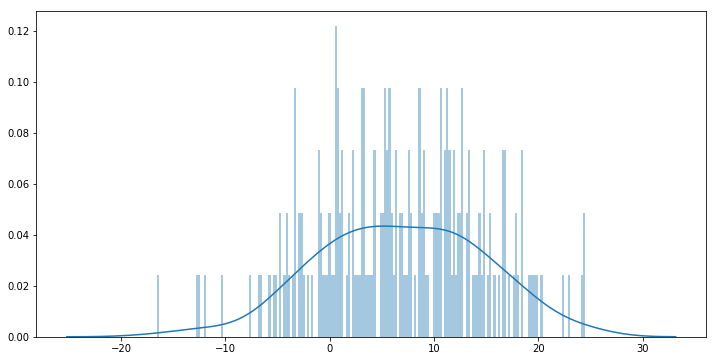

In [35]:
plt.figure(figsize = (12,6))
sns.distplot(np.mean(X,axis = 0), bins = 200)

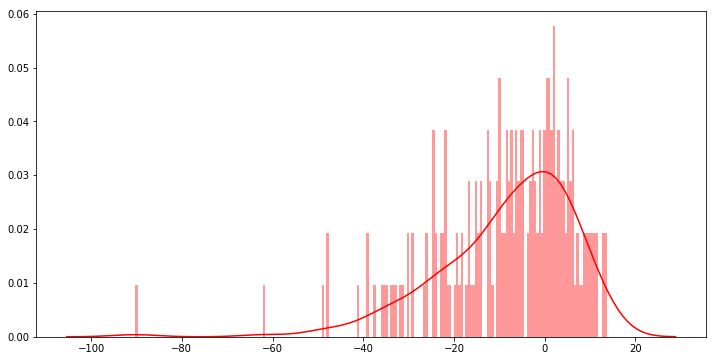

In [39]:
plt.figure(figsize = (12,6))
sns.distplot(np.min(X,axis = 0), bins = 200, color = 'red')

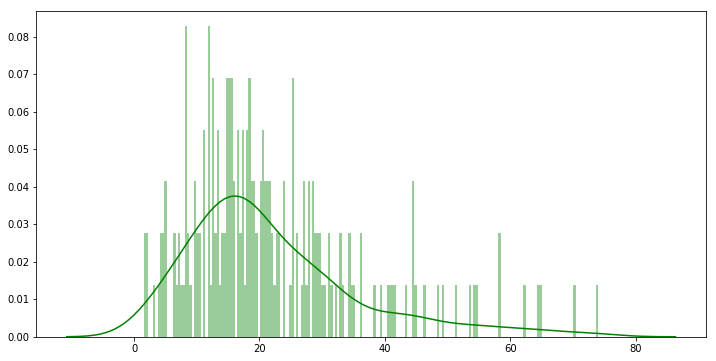

In [40]:
plt.figure(figsize = (12,6))
sns.distplot(np.max(X,axis = 0), bins = 200, color = 'green')

The data seems skewed and not normally distributed.
I am going to scaling data.

Let's check the correlations between variables. If one variable is strongly correlated with another, there is a risk of Multicollinearity, therefore, I might remove one of those variables.


In [31]:
corr=X.corr()

In [32]:
corr.head(10)

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
var_0,1.000000,-0.000544,0.006573,0.003801,0.001326,0.003046,0.006983,0.002429,0.004962,-0.002613,...,0.002752,0.000206,-0.005373,0.001616,-0.001514,0.002073,0.004386,-0.000753,-0.005776,0.003850
var_1,-0.000544,1.000000,0.003980,0.000010,0.000303,-0.000902,0.003258,0.001511,0.004098,-0.000832,...,0.006627,0.003621,-0.002604,0.001153,-0.002557,-0.000785,-0.000377,-0.004157,-0.004861,0.002287
var_2,0.006573,0.003980,1.000000,0.001001,0.000723,0.001569,0.000883,-0.000991,0.002648,-0.001932,...,0.000197,0.001285,-0.003400,0.000549,0.002104,-0.001070,0.003952,0.001078,-0.000877,0.003855
var_3,0.003801,0.000010,0.001001,1.000000,-0.000322,0.003253,-0.000774,0.002500,0.003553,-0.000826,...,0.000151,0.002445,-0.001530,-0.001699,-0.001054,0.001206,-0.002800,0.001164,-0.001651,0.000506
var_4,0.001326,0.000303,0.000723,-0.000322,1.000000,-0.001368,0.000049,0.004549,0.001194,-0.000918,...,0.001514,0.004357,0.003347,0.000813,-0.000068,0.003706,0.000513,-0.000046,-0.001821,-0.000786
var_5,0.003046,-0.000902,0.001569,0.003253,-0.001368,1.000000,0.002588,-0.000995,0.000147,-0.005279,...,0.001466,-0.000022,0.001116,-0.002237,-0.002543,-0.001274,0.002880,-0.000535,-0.000953,0.002767
var_6,0.006983,0.003258,0.000883,-0.000774,0.000049,0.002588,1.000000,-0.002548,-0.001188,-0.005697,...,0.000721,0.005604,-0.002563,0.002464,-0.001141,0.001244,0.005378,-0.003565,-0.003025,0.006096
var_7,0.002429,0.001511,-0.000991,0.002500,0.004549,-0.000995,-0.002548,1.000000,0.000814,0.002885,...,-0.000337,-0.003957,0.001733,0.003219,-0.000270,0.001854,0.001045,0.003466,0.000650,-0.001457
var_8,0.004962,0.004098,0.002648,0.003553,0.001194,0.000147,-0.001188,0.000814,1.000000,-0.001073,...,0.002923,-0.001151,-0.000429,0.001414,0.001313,0.001396,-0.003242,-0.004583,0.002950,0.000854
var_9,-0.002613,-0.000832,-0.001932,-0.000826,-0.000918,-0.005279,-0.005697,0.002885,-0.001073,1.000000,...,-0.000871,-0.002371,-0.000014,-0.001407,0.003099,-0.000868,0.000052,0.003701,0.002343,0.001070


Too many numbers. Visualization will help us.

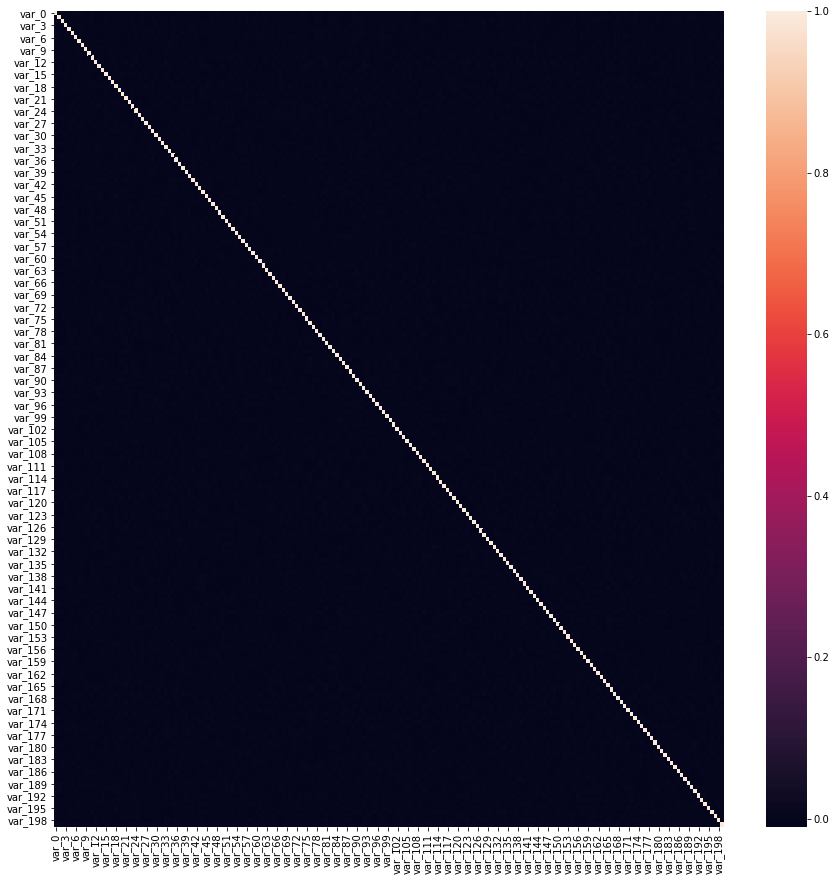

In [120]:
plt.figure(figsize=(15,15))
sns.heatmap(corr)

It seems like none of the variables are strongly correlated with each other. We don't have to remove any variables.

Now, let's focus on the independent variable. I'll check the distribution of Target

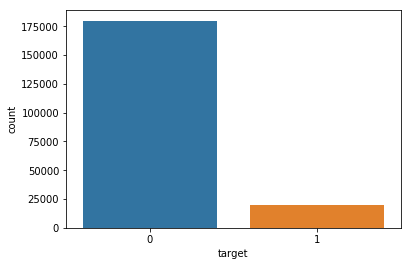

In [18]:
sns.countplot(y)

We have 8 times more target 0 than target 1. 

Our goal is to identify the customers who will make purchases in the future, who has target value 1. If we use this data without modifying it, our model might not do a good job of identifying it, no matter what model we use. So before I put data into the model, I want to augment the data which has dependent value 1. It might hurt the result but it sounds better than analyzing with extremely unbalanced data. 

## Augmentation

In [7]:
def aug(x,y,t):
    xs,xn = [],[]
    for i in range(t):
        x1 = x[y==1].copy()
        ids = np.arange(x1.shape[0])
        for c in range(x1.shape[1]):
            np.random.shuffle(ids)
            x1[:,c] = x1[ids][:,c]
        xs.append(x1)

    xs = np.vstack(xs)
    ys = np.ones(xs.shape[0])
    x = np.vstack([x,xs])
    y = np.concatenate([y,ys])
    return x,y

In [21]:
XX, YY = aug(X.values, y.values, 8)

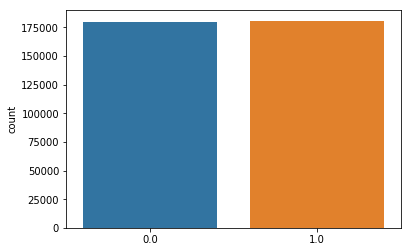

In [22]:
sns.countplot(YY)

Now the number of target 0 and target 1 is about the same.

## Scaling

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
sc = StandardScaler()
X_S = sc.fit_transform(XX)

## Training & Cross Validation data split

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X_S,YY, test_size = 0.1, random_state = 101)

# Modeling

Let's go with the simplest model, Logistic Regression. I choose it for my first model to set a benchmark. It is the simplest model, so can't get higher accuracy than other advanced models. Therefore, if the model besides logistic regression got a worse result than LR, we are not going to use that model.

After that, I will fit those data to gradient boosting models and Artificial neural network model because I think the dataset is big enough for deep learning, even though my computation power is not enough for that. Therefore, I will keep the models simple.

### Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state = 0)
classifier_lr.fit(X_train, y_train)

C:\Users\dan37\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [95]:
y_pred_lr = classifier_lr.predict(X_cv)

In [103]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_cv, y_pred_lr)
cm_lr_train = confusion_matrix(y_train, classifier_lr.predict(X_train))

In [104]:
cm_lr_train

array([[126495,  35456],
       [ 36457, 126297]], dtype=int64)

In [98]:
cm_lr

array([[14121,  3830],
       [ 4138, 13990]], dtype=int64)

In [109]:
print('we got %f%% accuracy on training set, and %f%% accuracy on cross validation set' %(100*(1 - (35456+36457)/len(y_train)), 100*(1 - (3830+4138)/len(y_cv))))

we got 77.852820% accuracy on training set, and 77.915131% accuracy on cross validation set


Logistic regression does not work very well. Let's try another model. If another model gets lower accuracy than 77%, it means the model is not working for this data.

## Gradient Boosting Models

I am going to use XGBoost and LightBGM. I use two different gradient boosting models because I am not sure which one works better for this data. However, I will concentrate more on LightBGM because it works much faster than another and I feel more comfortable about it. 

### XGBoost

XGBoost is basically the ensemble of many decision trees, so it will give us better accuracy than random forest or decision tree model. I believe it also works better than logistic regression, but take much longer time and we need to choose many hyper-parameters. So the result can be varied.

In [111]:
from xgboost import XGBClassifier
classifier = XGBClassifier(max_depth=3,
                              n_estimators=999999,
                              colsample_bytree=0.3,
                              learning_rate=0.02,
                              objective='binary:logistic', 
                              n_jobs=-1)

In [112]:
classifier.fit(X_train, y_train, 
              eval_set=[(X_train, y_train)], 
              verbose=0, early_stopping_rounds=1000)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.02, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=999999,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [115]:
y_pred_xgb = classifier.predict(X_cv)
cm_xgb= confusion_matrix(y_cv, y_pred_xgb)
cm_xgb_train = confusion_matrix(y_train, classifier.predict(X_train))

In [116]:
print("Confusion Matrix for training set")
cm_xgb_train

array([[138281,  23670],
       [ 26984, 135770]], dtype=int64)

In [117]:
print("Confusion Matrix for cross validation set")
cm_xgb

array([[15098,  2853],
       [ 3314, 14814]], dtype=int64)

In [66]:
print('we have gotten %f%% accuracy on the training set, and %f%% accuracy on the cross validation set' %(100*(1 - (23670+26984)/len(y_train)), 100*(1 - (3314+2853)/len(y_cv))))

we have gotten 84.399994% accuracy on the training set, and 82.906954% accuracy on the cross validation set


Tuning hyper-parameters for better result.
First, max_depth and min_child_weight.

In [127]:
from sklearn.model_selection import GridSearchCV

param_test1 = {
 'max_depth':range(2,3,10),
 'min_child_weight':range(1,2,5)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.02, n_estimators=999999, max_depth=2,
 min_child_weight=1, gamma=0, subsample=1, colsample_bytree=0.3,
 objective= 'binary:logistic',scale_pos_weight=1),                    
 param_grid = param_test1, scoring='auc',n_jobs=4,iid=False, cv=5)

In [ ]:
gsearch1.fit(X_train,y_train, eval_set=[(X_train, y_train)], verbose=0, early_stopping_rounds=1000)


We can also tune gamma, subsample,colsample_bytree, and other regularization parameters, but it will take more than 50 hours for my laptop to run that one single line of code, so I won't do that here.

As we can see, we can get a better result from XGBoost than the result of Logistic Regression. However, It took too much time. I don't have enough computation power to run the grid search to pick the best parameter. I have run it in another program before I am writing this and accuracy went up to 90% for CV data, but it took 3 days to run that and I couldn't use my laptop during that time.

But clearly, XGBoost works well, so I am going to use another, more recent and advanced gradient boosting model to save my time and my laptop. 

## LightGBM

In [7]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold, KFold

In [8]:
lgb_params = {
    "objective" : "binary",
    "metric" : "auc",
    "boosting": 'gbdt',
    "max_depth" : -1,
    "num_leaves" : 13,
    "learning_rate" : 0.01,
    "bagging_freq": 5,
    "bagging_fraction" : 0.4,
    "feature_fraction" : 0.05,
    "min_data_in_leaf": 80,
    "min_sum_heassian_in_leaf": 10,
    "tree_learner": "serial",
    "boost_from_average": "false",
    "bagging_seed" : 101,
    "verbosity" : 1,
    "seed": 101}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)


In the last models, I augment data first and then separate to train and cv sets. This time, I am going to use k-fold cross-validation. Therefore, I separate to train and cv first and then augment the data. I am going to use same aug function though. 

Since I am using 5 -fold cross-validation, I do not augment 'target 1' data 8 times, just double it. LightBGM doesn't require scaling, so I can skip that.

In [84]:
from sklearn.metrics import roc_auc_score

temp = train[['ID_code', 'target']]
temp['predict'] = 0
predictions = test[['ID_code']]
val_aucs = []
feature_importance_df = pd.DataFrame()
features = [col for col in train.columns if col not in ['target', 'ID_code']]

for fold, (trn_idx, val_idx) in enumerate(skf.split(train, train['target'])):
    X_train, y_train = train.iloc[trn_idx][features], train.iloc[trn_idx]['target']
    X_cv, y_cv = train.iloc[val_idx][features], train.iloc[val_idx]['target']

    N = 5
    
    p_valid,yp = 0,0
    for i in range(N):
        
        X_t, y_t = aug(X_train.values, y_train.values)
        X_t = pd.DataFrame(X_t)
        X_t = X_t.add_prefix('var_')
    
        trn_data = lgb.Dataset(X_t, label=y_t)
        val_data = lgb.Dataset(X_cv, label=y_cv)
        evals_result = {}
        lgb_clf = lgb.train(lgb_params,
                        trn_data,
                        100000,
                        valid_sets = [trn_data, val_data],
                        early_stopping_rounds=3000,
                        verbose_eval = 1000,
                        evals_result=evals_result
                       )
        p_valid += lgb_clf.predict(X_cv)
        yp += lgb_clf.predict(X_test)
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = features
    fold_importance_df["importance"] = lgb_clf.feature_importance()
    fold_importance_df["fold"] = fold + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    temp['predict'][val_idx] = p_valid/N
    val_score = roc_auc_score(y_cv, p_valid)
    val_aucs.append(val_score)
    
    predictions['fold{}'.format(fold+1)] = yp/N


C:\Users\dan37\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.890809	valid_1's auc: 0.883285
[2000]	training's auc: 0.900954	valid_1's auc: 0.891919
[3000]	training's auc: 0.907641	valid_1's auc: 0.896658
[4000]	training's auc: 0.912385	valid_1's auc: 0.899247
[5000]	training's auc: 0.916094	valid_1's auc: 0.900814
[6000]	training's auc: 0.919109	valid_1's auc: 0.902005
[7000]	training's auc: 0.921722	valid_1's auc: 0.902672
[8000]	training's auc: 0.924128	valid_1's auc: 0.902868
[9000]	training's auc: 0.926352	valid_1's auc: 0.903149
[10000]	training's auc: 0.928502	valid_1's auc: 0.90313
[11000]	training's auc: 0.930624	valid_1's auc: 0.903131
[12000]	training's auc: 0.932709	valid_1's auc: 0.903086
[13000]	training's auc: 0.934714	valid_1's auc: 0.903112
[14000]	training's auc: 0.936718	valid_1's auc: 0.903032
Early stopping, best iteration is:
[11391]	training's auc: 0.93144	valid_1's auc: 0.903184
Training until validation scores don't improve for 3000 r

C:\Users\dan37\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dan37\Anaconda3\lib\site-packages\pandas\core\series.py:977: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._set_labels(key, value)
C:\Users\dan37\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\dan37\Anaconda3\lib\site-packages\ipykernel_l

Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.892647	valid_1's auc: 0.878914
[2000]	training's auc: 0.902358	valid_1's auc: 0.88742
[3000]	training's auc: 0.908783	valid_1's auc: 0.892158
[4000]	training's auc: 0.913485	valid_1's auc: 0.895303
[5000]	training's auc: 0.917109	valid_1's auc: 0.897172
[6000]	training's auc: 0.920098	valid_1's auc: 0.89835
[7000]	training's auc: 0.922695	valid_1's auc: 0.899115
[8000]	training's auc: 0.925086	valid_1's auc: 0.899463
[9000]	training's auc: 0.927306	valid_1's auc: 0.899751
[10000]	training's auc: 0.929484	valid_1's auc: 0.899892
[11000]	training's auc: 0.931601	valid_1's auc: 0.899965
[12000]	training's auc: 0.933692	valid_1's auc: 0.89993
[13000]	training's auc: 0.935703	valid_1's auc: 0.899948
[14000]	training's auc: 0.937673	valid_1's auc: 0.899899
[15000]	training's auc: 0.939595	valid_1's auc: 0.899871
Early stopping, best iteration is:
[12744]	training's auc: 0.935193	valid_1's auc: 0.89999
Tr

C:\Users\dan37\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dan37\Anaconda3\lib\site-packages\pandas\core\series.py:977: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._set_labels(key, value)
C:\Users\dan37\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\dan37\Anaconda3\lib\site-packages\ipykernel_l

Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.891053	valid_1's auc: 0.881925
[2000]	training's auc: 0.90107	valid_1's auc: 0.889835
[3000]	training's auc: 0.90778	valid_1's auc: 0.894703
[4000]	training's auc: 0.912638	valid_1's auc: 0.897581
[5000]	training's auc: 0.9164	valid_1's auc: 0.89931
[6000]	training's auc: 0.919392	valid_1's auc: 0.900256
[7000]	training's auc: 0.921987	valid_1's auc: 0.900856
[8000]	training's auc: 0.924396	valid_1's auc: 0.901107
[9000]	training's auc: 0.926638	valid_1's auc: 0.901304
[10000]	training's auc: 0.928796	valid_1's auc: 0.90139
[11000]	training's auc: 0.930902	valid_1's auc: 0.90145
[12000]	training's auc: 0.932953	valid_1's auc: 0.901408
[13000]	training's auc: 0.93493	valid_1's auc: 0.901338
Early stopping, best iteration is:
[10965]	training's auc: 0.930825	valid_1's auc: 0.901476
Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.890969	valid_1's auc: 0.881645


C:\Users\dan37\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dan37\Anaconda3\lib\site-packages\pandas\core\series.py:977: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._set_labels(key, value)
C:\Users\dan37\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\dan37\Anaconda3\lib\site-packages\ipykernel_l

Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.891853	valid_1's auc: 0.883036
[2000]	training's auc: 0.901772	valid_1's auc: 0.891339
[3000]	training's auc: 0.908153	valid_1's auc: 0.896061
[4000]	training's auc: 0.912863	valid_1's auc: 0.899067
[5000]	training's auc: 0.916538	valid_1's auc: 0.901177
[6000]	training's auc: 0.919503	valid_1's auc: 0.902294
[7000]	training's auc: 0.922101	valid_1's auc: 0.902946
[8000]	training's auc: 0.924467	valid_1's auc: 0.903472
[9000]	training's auc: 0.926688	valid_1's auc: 0.903722
[10000]	training's auc: 0.928897	valid_1's auc: 0.903714
[11000]	training's auc: 0.93102	valid_1's auc: 0.903806
[12000]	training's auc: 0.933093	valid_1's auc: 0.903736
[13000]	training's auc: 0.935095	valid_1's auc: 0.903796
[14000]	training's auc: 0.937095	valid_1's auc: 0.903731
Early stopping, best iteration is:
[11093]	training's auc: 0.931219	valid_1's auc: 0.903827
Training until validation scores don't improve for 3000 

C:\Users\dan37\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dan37\Anaconda3\lib\site-packages\pandas\core\series.py:977: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._set_labels(key, value)
C:\Users\dan37\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\dan37\Anaconda3\lib\site-packages\ipykernel_l

Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.892129	valid_1's auc: 0.875298
[2000]	training's auc: 0.902302	valid_1's auc: 0.884453
[3000]	training's auc: 0.90887	valid_1's auc: 0.889238
[4000]	training's auc: 0.913605	valid_1's auc: 0.892392
[5000]	training's auc: 0.917245	valid_1's auc: 0.894329
[6000]	training's auc: 0.920235	valid_1's auc: 0.895295
[7000]	training's auc: 0.922855	valid_1's auc: 0.895806
[8000]	training's auc: 0.925237	valid_1's auc: 0.896169
[9000]	training's auc: 0.927456	valid_1's auc: 0.89622
[10000]	training's auc: 0.929631	valid_1's auc: 0.896251
[11000]	training's auc: 0.931698	valid_1's auc: 0.896184
[12000]	training's auc: 0.933751	valid_1's auc: 0.896111
Early stopping, best iteration is:
[9515]	training's auc: 0.928592	valid_1's auc: 0.896277
Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.892293	valid_1's auc: 0.875711
[2000]	training's auc: 0.902319	valid_1's auc: 0.884

C:\Users\dan37\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dan37\Anaconda3\lib\site-packages\pandas\core\series.py:977: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._set_labels(key, value)
C:\Users\dan37\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\dan37\Anaconda3\lib\site-packages\ipykernel_l

In [69]:
print('The average accuracy of predicting the CV set 5 times are %f%%' %90.1)

The average accuracy of predicting the CV set 5 times are 90.100000%



LightBGM works much better than XGBoost! I can also tune the hyper-parameters (actually I have already tunned several parameters) using grid. However, It requires a very high computational cost, which I don't have, so I won't try that. Also, 90.1% of accuracy is a pretty good result. I have submitted this result to Kaggle and I got exactly the same accuracy on the test set.

Let's check the importance of the variables, even though it is not necessary.

Text(0.5, 1.0, 'Variable Importance')

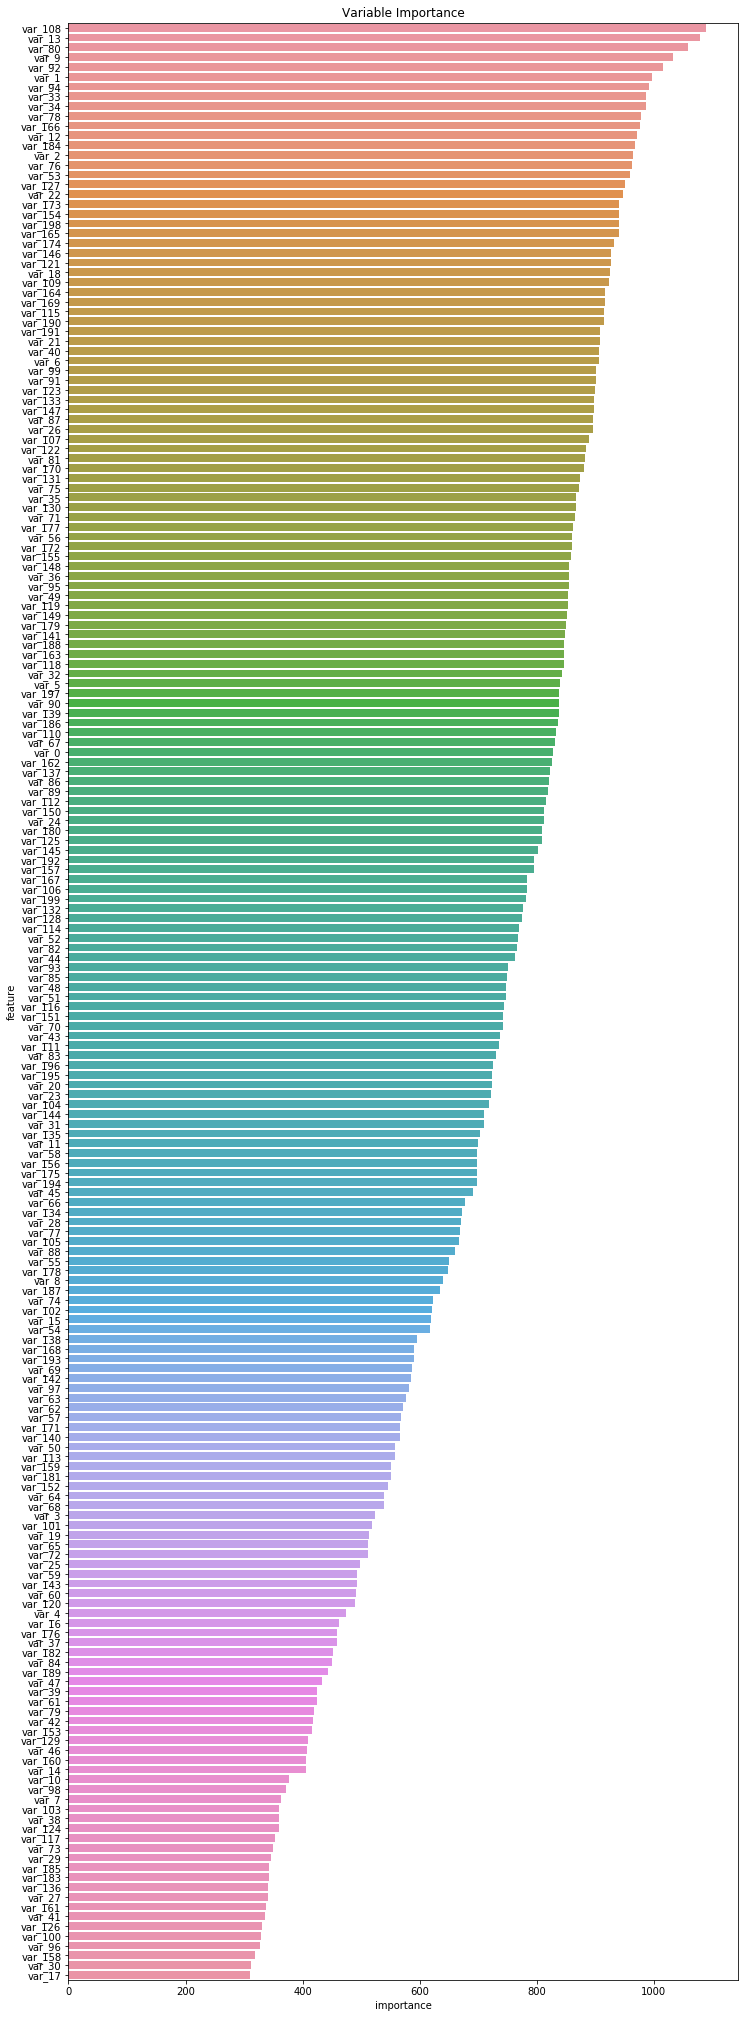

In [113]:
descend = feature_importance_df[['feature','importance']].groupby('feature').mean().sort_values(by='importance', ascending=False)
plt.figure(figsize=(12,36))
sns.barplot(x = descend['importance'], y = descend.index)
plt.title('Variable Importance')

Var_108 is the most important variable to predict, but we don't know what var_108 actually is, so it doesn't mean a lot to me, but it could be to Standard Chartered. 

## Deep Learning Model

### Artificial Neural Networks

We have 2,000,000 data and I think it is big enough to deep learning algorithm find some rules in the data. In my opinion, Artificial Neural Networks model is just a big ensemble of Logistic Regression models, but a lot of them. So it has to work better than Logistic Regression. Since we have 200 variables, I am going to use 128 units for each layer. When we use several layers, it has a chance to be overfitted, therefore I am using 10% of dropout. I tried several dropout ratios, but if the ratio is higher than 10%, the model got lower accuracy. I am also using batch normalization. It is similar to scaling input data, but not only scaling the input for the first layer, scaling the input data for every single layer. It might increase the accuracy and definitely speed up the model. 

I can build a deep learning model in several ways, but the easiest way I know is using Keras. With Keras, we can build the model of a neural network with only a few lines of codes. 

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

Using TensorFlow backend.


Data is scaled and divided to train and cv sets, as I did before.

Let's start with 4 layers.

In [36]:
classifier = Sequential()
classifier.add(Dense(units = 100, kernel_initializer = 'glorot_uniform', activation = 'relu', input_dim = 200))
classifier.add(Dropout(0.1))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 100, kernel_initializer = 'glorot_uniform', activation = 'relu'))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 100, kernel_initializer = 'glorot_uniform', activation = 'relu'))
classifier.add(BatchNormalization())

classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))


In [38]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 64, epochs = 100)

Epoch 1/100
324705/324705 [==============================] - 18s 56us/step - loss: 0.4586 - acc: 0.7833
Epoch 2/100
324705/324705 [==============================] - 18s 55us/step - loss: 0.4503 - acc: 0.7876
Epoch 3/100
324705/324705 [==============================] - 20s 62us/step - loss: 0.4450 - acc: 0.7909
Epoch 4/100
324705/324705 [==============================] - 18s 54us/step - loss: 0.4403 - acc: 0.7938
Epoch 5/100
324705/324705 [==============================] - 18s 56us/step - loss: 0.4365 - acc: 0.7964
Epoch 6/100
324705/324705 [==============================] - 18s 56us/step - loss: 0.4344 - acc: 0.7969
Epoch 7/100
324705/324705 [==============================] - 18s 55us/step - loss: 0.4313 - acc: 0.7993
Epoch 8/100
324705/324705 [==============================] - 16s 48us/step - loss: 0.4293 - acc: 0.7996
Epoch 9/100
324705/324705 [==============================] - 15s 46us/step - loss: 0.4279 - acc: 0.8012
Epoch 10/100
324705/324705 [==============================] - 17

324705/324705 [==============================] - 18s 56us/step - loss: 0.3859 - acc: 0.8233
Epoch 80/100
324705/324705 [==============================] - 17s 54us/step - loss: 0.3851 - acc: 0.8241
Epoch 81/100
324705/324705 [==============================] - 16s 50us/step - loss: 0.3854 - acc: 0.8243
Epoch 82/100
324705/324705 [==============================] - 18s 54us/step - loss: 0.3849 - acc: 0.8243
Epoch 83/100
324705/324705 [==============================] - 18s 55us/step - loss: 0.3844 - acc: 0.8247
Epoch 84/100
324705/324705 [==============================] - 18s 54us/step - loss: 0.3851 - acc: 0.8240
Epoch 85/100
324705/324705 [==============================] - 18s 57us/step - loss: 0.3846 - acc: 0.8243
Epoch 86/100
324705/324705 [==============================] - 18s 54us/step - loss: 0.3843 - acc: 0.8241
Epoch 87/100
324705/324705 [==============================] - 15s 47us/step - loss: 0.3838 - acc: 0.8251
Epoch 88/100
324705/324705 [==============================] - 15s 48

In [40]:
y_pred = classifier.predict(X_cv)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix
cm_nn = confusion_matrix(y_cv, y_pred)

In [41]:
cm_nn

array([[13423,  4455],
       [ 3833, 14368]], dtype=int64)

In [55]:
print('The accuracy of NN model on cross validation set is %f%%' %((1-(4455+3833)/len(y_cv))*100))

The accuracy of NN model on cross validation set is 77.028188%


The model looks fine. Loss function keeps decreasing and accuracy slightly increasing. It could get a better result if I tune some hyper-parameter.

However, It took more than an hour to run the codes for NN but accuracy on the cross-validation set is similar to Logistic Regression. I should change my opinion. This data might not big enough for deep learning algorithms or this data is not a good fit for NN. Either way, there is no point to keep improving model. I already got a model with 90% accuracy. I would rather improve that model instead of spending more time on this model. However, I want to modify some of the models.

First, I use both dropout and Batch Norm, even though I only use dropout in the first layer. Therefore I remove some of Batch Norm.
After I remove the batch norm, the model doesn't improve. So I decrease the batch size to 32.

In [60]:
classifier = Sequential()
classifier.add(Dense(units = 100, kernel_initializer = 'glorot_uniform', activation = 'relu', input_dim = 200))
classifier.add(Dropout(0.1))

classifier.add(Dense(units = 100, kernel_initializer = 'glorot_uniform', activation = 'relu'))
classifier.add(Dense(units = 100, kernel_initializer = 'glorot_uniform', activation = 'relu'))

classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))


In [62]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 32, epochs = 60)

Epoch 1/60
324705/324705 [==============================] - 21s 64us/step - loss: 0.4199 - acc: 0.8055
Epoch 2/60
324705/324705 [==============================] - 21s 64us/step - loss: 0.4190 - acc: 0.8058
Epoch 3/60
324705/324705 [==============================] - 21s 64us/step - loss: 0.4175 - acc: 0.8071
Epoch 4/60
324705/324705 [==============================] - 20s 62us/step - loss: 0.4156 - acc: 0.8082
Epoch 5/60
324705/324705 [==============================] - 19s 58us/step - loss: 0.4137 - acc: 0.8086
Epoch 6/60
324705/324705 [==============================] - 19s 58us/step - loss: 0.4112 - acc: 0.8103
Epoch 7/60
324705/324705 [==============================] - 21s 64us/step - loss: 0.4100 - acc: 0.8109
Epoch 8/60
324705/324705 [==============================] - 22s 69us/step - loss: 0.4080 - acc: 0.8118
Epoch 9/60
324705/324705 [==============================] - 22s 68us/step - loss: 0.4070 - acc: 0.8119
Epoch 10/60
324705/324705 [==============================] - 22s 69us/ste

In [65]:
y_pred = classifier.predict(X_cv)
y_pred = (y_pred > 0.5)

cm_nn_2 = confusion_matrix(y_cv, y_pred)
cm_nn_2

array([[14126,  3752],
       [ 4565, 13636]], dtype=int64)

Still, accuracy doesn't go up. NN might not a good model for this dataset.
The model could be improved if I use K-fold or convolutional neural network, but I am not going to try that here.

## Conclusion

I have tried several models to indicate which customers will make a specific transaction in the future. First, I've worked with logistic regression to set the rock bottom point. After that, I used XGBoost and LightGBM. I only use K-fold on LightGBM since it is much faster. I might use it to XGBoost if I have more computation power. LightGBM works much better than XGBoost, however, if I tune hyper-parameters, the result could be changed. After that, since I wanted to use at least one deep learning model, I choose NN, the most simple deep learning model. I could have used CNN but I think it doesn't match with the data. I was planning to use K-fold on Neural Network model, but after I ran a simple model to test, I decided not to do that since the accuracy was near my bottom point.
LightBGM works very well, it has slightly higher accuracy than 90%. However, I cannot say it is an extremely good result. Even though I augmented data, before that, the ratio data with target 0 and 1 is 8:1. Therefore, if there is a model that says every user is not going to make a specific transaction, it will have 88.8% accuracy on the 'before the augmentation training set'. Of course, it will have 50% accuracy on the augmented set. 

The model can be improved if I use a grid search which helps me to get better hyper-parameters or pick higher k for K-fold.

Thank you for reading my portfolio.